In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Loading of the data

In [2]:
# Accessing the current path
current_path = os.getcwd()
print(current_path)

/Users/lou/Documents/GitHub/MicrobiotaAndCo


In [3]:
# Loading the data
character_metadata = pd.read_csv(current_path + "/Data/character.metadata.tsv", sep='\t', header=None)
movie_metadata = pd.read_csv(current_path + "/Data/movie.metadata.tsv", sep = "\t", header= None)
name_clusters = pd.read_csv(current_path + "/Data/name.clusters.txt", sep = "\t", header=None)
plot_summaries = pd.read_csv(current_path + "/Data/plot_summaries.txt", sep ="\t", header=None)
tvtropes_clusters = pd.read_csv(current_path + "/Data/tvtropes.clusters.txt", sep = "\t", header=None)

# Going through each dataset

### Character Metadata

Metadata for 450,669 characters aligned to the movies above, extracted from the Noverber 4, 2012 dump of Freebase.

In [4]:
character_metadata.columns = ["Wikipedia Movie ID", "Freebase Movie ID", "Movie Release Date", "Character Name", "Actor date of birth", "Actor Gender", "Actor Height", "Acctor Ethnicity", "Actor Name", "Actor age at movie realise", "Freebase Character Map ID", "Freebase character ID", "Freebase actor ID"]
character_metadata.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie Release Date,Character Name,Actor date of birth,Actor Gender,Actor Height,Acctor Ethnicity,Actor Name,Actor age at movie realise,Freebase Character Map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


There are a lot a  missing values (NaN) and I need to understand how to decrypte the actor ethincity

### Movie Metadata

Metadata for 81,741 movies, extracted from the Noverber 4, 2012 dump of Freebase.

In [5]:
movie_metadata.columns = ["Wikipedia Movie ID", "Freebase Movie ID", "Movie Name", "Movie Release Date", "Movie Box Office Revenue", "Movie Runtime", "Movie Language", "Movie Country", "Movie Genre"]
movie_metadata.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie Name,Movie Release Date,Movie Box Office Revenue,Movie Runtime,Movie Language,Movie Country,Movie Genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


### Name Clusters

970 unique character names used in at least two different movies, along with 2,666 instances of those types.  The ID field indexes into the Freebase character/actor map ID in character.metadata.tsv.

In [6]:
name_clusters.columns = ["Character Name","Freebase Character Map ID"]
name_clusters.head()

,Character Name,Freebase Character Map ID
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn


### Plot Summaries

Plot summaries of 42,306 movies extracted from the November 2, 2012 dump of English-language Wikipedia.  Each line contains the Wikipedia movie ID (which indexes into movie.metadata.tsv) followed by the summary.

In [7]:
plot_summaries.columns = ["Wikipedia Movie ID","Summary"]
plot_summaries.head()

,Wikipedia Movie ID,Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


### TVtropes culsters

72 character types drawn from tvtropes.com, along with 501 instances of those types.  The ID field indexes into the Freebase character/actor map ID in character.metadata.tsv.

In [8]:
tvtropes_clusters.columns = ["Character Types","Freebase Character Map ID"]
tvtropes_clusters.head()

,Character Types,Freebase Character Map ID
0,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"":..."
1,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi..."
2,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S..."
3,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!..."
4,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""..."


I need to reformate it, in Freebase Character Map ID there are: Character Name, Movie name, Freebase Character Map ID and Actor Name.

In [9]:
import json  # To parse string representations of dictionaries

list_inside_FCM_ID = []

for el in tvtropes_clusters["Freebase Character Map ID"]:
    # Convert string to dictionary
    parsed_el = json.loads(el)
    
    # Create a DataFrame for each dictionary
    new_data = pd.DataFrame([parsed_el])
    
    # Append the resulting DataFrame to the list
    list_inside_FCM_ID.append(new_data)

print(list_inside_FCM_ID[0])

inside_FCM_ID = pd.concat(list_inside_FCM_ID)
inside_FCM_ID = inside_FCM_ID.reset_index()
inside_FCM_ID = inside_FCM_ID.drop(columns="index")
inside_FCM_ID.head()


                        char    movie         id           actor
0  Professor Philip Brainard  Flubber  /m/0jy9q0  Robin Williams


,char,movie,id,actor
0,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


In [10]:
tvtropes_clusters = pd.concat([tvtropes_clusters, inside_FCM_ID], axis=1)
tvtropes_clusters = tvtropes_clusters.drop(columns= "Freebase Character Map ID")
tvtropes_clusters = tvtropes_clusters.rename(columns={"id": "Freebase Character Map ID"})
tvtropes_clusters.head()

,Character Types,char,movie,Freebase Character Map ID,actor
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


## How can I translate the actor ethnicity?

There are no info on the files, but maybe for the other ethnicity ID = country movie ID. <br>
I need to create a dictionary about each country and verify if we find the correct translation for the actor ethnicity.

In [21]:
count_countries = movie_metadata["Movie Country"].value_counts()
count_countries = count_countries.reset_index()
count_countries

,Movie Country,count
0,"{""/m/09c7w0"": ""United States of America""}",30300
1,"{""/m/03rk0"": ""India""}",8240
2,{},8154
3,"{""/m/07ssc"": ""United Kingdom""}",5343
4,"{""/m/03_3d"": ""Japan""}",2242
...,...,...
2119,"{""/m/06mkj"": ""Spain"", ""/m/02jx1"": ""England"", ""...",1
2120,"{""/m/09c7w0"": ""United States of America"", ""/m/...",1
2121,"{""/m/01mjq"": ""Czech Republic"", ""/m/087vz"": ""Yu...",1
2122,"{""/m/02vzc"": ""Finland"", ""/m/07t21"": ""Ukraine"",...",1


In [22]:
#Making a list of all the countries
list_countries = []
for el in count_countries['Movie Country']:
    list_countries.append(el)
print(list_countries)

['{"/m/09c7w0": "United States of America"}', '{"/m/03rk0": "India"}', '{}', '{"/m/07ssc": "United Kingdom"}', '{"/m/03_3d": "Japan"}', '{"/m/0f8l9c": "France"}', '{"/m/03rjj": "Italy"}', '{"/m/0d060g": "Canada"}', '{"/m/0jgd": "Argentina"}', '{"/m/03h64": "Hong Kong"}', '{"/m/09c7w0": "United States of America", "/m/07ssc": "United Kingdom"}', '{"/m/06qd3": "South Korea"}', '{"/m/0345h": "Germany"}', '{"/m/0b90_r": "Mexico"}', '{"/m/09c7w0": "United States of America", "/m/0d060g": "Canada"}', '{"/m/0chghy": "Australia"}', '{"/m/059j2": "Netherlands"}', '{"/m/0f8l9c": "France", "/m/03rjj": "Italy"}', '{"/m/06mkj": "Spain"}', '{"/m/0k6nt": "Denmark"}', '{"/m/0d0vqn": "Sweden"}', '{"/m/05vz3zq": "Soviet Union"}', '{"/m/05v8c": "Philippines"}', '{"/m/0d05w3": "China"}', '{"/m/01mk6": "Czechoslovakia"}', '{"/m/03f2w": "German Democratic Republic"}', '{"/m/05qhw": "Poland"}', '{"/m/09c7w0": "United States of America", "/m/0345h": "Germany"}', '{"/m/05b4w": "Norway"}', '{"/m/03gj2": "Hungar

Some Movie have a double nationality...

In [29]:
# The list_countries contains string, I want it to contain dictionaries
import ast

list_countries_dico = []

for el in list_countries:
    if isinstance(el, str):
        # Try to evaluate the string if it's a valid one
        try:
            list_countries_dico.append(ast.literal_eval(el))
        except (ValueError, SyntaxError):
            print(f"Skipping invalid entry: {el}")
    elif isinstance(el, dict):
        # Directly append if it's already a dictionary
        list_countries_dico.append(el)
    else:
        print(f"Skipping unsupported type: {type(el)}")

print(list_countries_dico)

[{'/m/09c7w0': 'United States of America'}, {'/m/03rk0': 'India'}, {}, {'/m/07ssc': 'United Kingdom'}, {'/m/03_3d': 'Japan'}, {'/m/0f8l9c': 'France'}, {'/m/03rjj': 'Italy'}, {'/m/0d060g': 'Canada'}, {'/m/0jgd': 'Argentina'}, {'/m/03h64': 'Hong Kong'}, {'/m/09c7w0': 'United States of America', '/m/07ssc': 'United Kingdom'}, {'/m/06qd3': 'South Korea'}, {'/m/0345h': 'Germany'}, {'/m/0b90_r': 'Mexico'}, {'/m/09c7w0': 'United States of America', '/m/0d060g': 'Canada'}, {'/m/0chghy': 'Australia'}, {'/m/059j2': 'Netherlands'}, {'/m/0f8l9c': 'France', '/m/03rjj': 'Italy'}, {'/m/06mkj': 'Spain'}, {'/m/0k6nt': 'Denmark'}, {'/m/0d0vqn': 'Sweden'}, {'/m/05vz3zq': 'Soviet Union'}, {'/m/05v8c': 'Philippines'}, {'/m/0d05w3': 'China'}, {'/m/01mk6': 'Czechoslovakia'}, {'/m/03f2w': 'German Democratic Republic'}, {'/m/05qhw': 'Poland'}, {'/m/09c7w0': 'United States of America', '/m/0345h': 'Germany'}, {'/m/05b4w': 'Norway'}, {'/m/03gj2': 'Hungary'}, {'/m/015fr': 'Brazil'}, {'/m/082fr': 'West Germany'}, 

# Remarks

Can diffrent actor be assossiate to a same movie? <br>
How many character are assossiated per movie? <br>
Can we create a list of character atributes per movie? <br>
Criteria counting for diversity: actor gender, actor height, actor ethinicty, actor age at the release of the movie. <br>
Information about the movie that we need to keep: Movie ID, Movie country (to see if the actor ethnicity differ from the country of release), Movie release date (to see the evolution with time)

# Has the diversity of attributes (gender, ethnicity, age, etc, …) evolved with age?

Has the proportion of character's diversity increase with the years? <br>
I. What are the critereia included for diversity <br>
II. Can we assess the evolution of each criteria according to the years? <br>
III. How can we compute the diversity? Should we create a sort of score? <bd>
III. Can we compute the proportion of character's diversity per year? <br>
IV. Can we make a new data frame continaing the movie date of release and the character's diversity proportion ? <br>
V. Does it changes according to the movie release country? 


# "Get woke, go broke" or "get woke or go broke"?

Has the box officice movie revenue increase with diversity? <br>
I. Can we compute the proportion of character's diversity for each movie? <br>
II. Do the movies with a higher proportion of character's diversity earn more revenue than those that have not? <br>
III. Can we make a new data frame continaing the wikipedia movie ID, box office revenue and the diversity propoortion? <br>
V. Does it changes according to the movie release country? 

In [12]:
# Number of movies
len(movie_metadata['Freebase Movie ID'])

81741

In [13]:
# Number of characters
len(character_metadata['Actor Name'])

450669

In [14]:
number_of_character_per_movie = character_metadata['Freebase Movie ID'].value_counts()
number_of_character_per_movie = number_of_character_per_movie.reset_index()
print(number_of_character_per_movie)

      Freebase Movie ID  count
0            /m/0cc8620    115
1            /m/04grkmd     87
2            /m/02725hs     81
3            /m/02qr3k8     81
4            /m/02825cv     72
...                 ...    ...
64325        /m/0cmclxg      1
64326         /m/03cv5k      1
64327         /m/06nn72      1
64328        /m/05b3jf_      1
64329        /m/0gx_m64      1

[64330 rows x 2 columns]


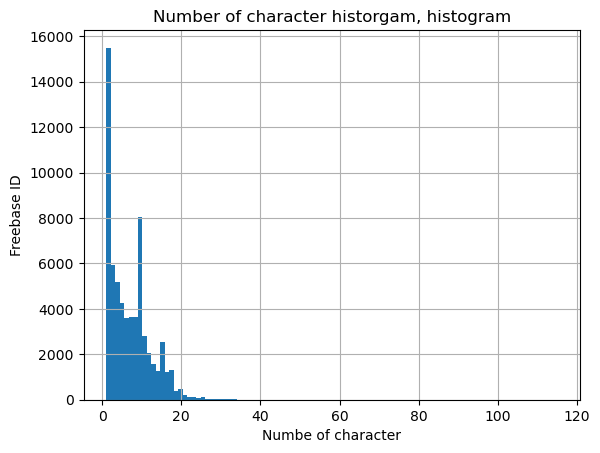

In [15]:
#we use pandas wrapper
number_of_character_per_movie['count'].hist(bins = 100)

#alternatively, we can use matplotlib directly
#plt.hist(movies['worldwide_gross'].values, bins = 100)

plt.xlabel('Numbe of character')
plt.ylabel('Freebase ID')
plt.title('Number of character historgam, histogram');

The number of character per movies vary a lot. <br>
The majority of movie possess only one important character. Can we chosse to focus only on this moovie (it will make the analisis easier)

In [16]:
# Computation of the proportion of moovies that has only one relevant character
def character_number_proportion(data, number_of_character, count_label = 'count'):
    total_number_of_movie = len(data[count_label])
    count = 0
    for el in data[count_label]:
        if el == number_of_character:
            count +=1
    percentage = round(count/total_number_of_movie*100, 2)
    print ('Percentage of movie that contains ', number_of_character, ' important character : ', percentage )
    return percentage

for i in np.arange(1, 20, 1):
    character_number_proportion(number_of_character_per_movie, i)

Percentage of movie that contains  1  important character :  13.7
Percentage of movie that contains  2  important character :  10.4
Percentage of movie that contains  3  important character :  9.2
Percentage of movie that contains  4  important character :  8.03
Percentage of movie that contains  5  important character :  6.6
Percentage of movie that contains  6  important character :  5.61
Percentage of movie that contains  7  important character :  5.67
Percentage of movie that contains  8  important character :  5.67
Percentage of movie that contains  9  important character :  5.81
Percentage of movie that contains  10  important character :  6.73
Percentage of movie that contains  11  important character :  4.33
Percentage of movie that contains  12  important character :  3.18
Percentage of movie that contains  13  important character :  2.47
Percentage of movie that contains  14  important character :  1.95
Percentage of movie that contains  15  important character :  3.93
Percen

In [17]:
# Computation of the proportion of moovies that has only one relevant character
def character_number_proportion_over_n(data, number_of_character=1, count_label = 'count'):
    total_number_of_movie = len(data[count_label])
    count = 0
    for el in data[count_label]:
        if el != number_of_character:
            count +=1
    percentage = round(count/total_number_of_movie*100, 2)
    print ('Percentage of movie that contains over ', number_of_character, ' important character : ', percentage )
    return percentage

for i in np.arange(1, 20, 1):
    character_number_proportion_over_n(number_of_character_per_movie, i)

Percentage of movie that contains over  1  important character :  86.3
Percentage of movie that contains over  2  important character :  89.6
Percentage of movie that contains over  3  important character :  90.8
Percentage of movie that contains over  4  important character :  91.97
Percentage of movie that contains over  5  important character :  93.4
Percentage of movie that contains over  6  important character :  94.39
Percentage of movie that contains over  7  important character :  94.33
Percentage of movie that contains over  8  important character :  94.33
Percentage of movie that contains over  9  important character :  94.19
Percentage of movie that contains over  10  important character :  93.27
Percentage of movie that contains over  11  important character :  95.67
Percentage of movie that contains over  12  important character :  96.82
Percentage of movie that contains over  13  important character :  97.53
Percentage of movie that contains over  14  important character 

In [18]:
test_1_movie_metadata = pd.DataFrame({'Freebase Movie ID': ['A', 'B', 'C', 'D']})
test_1_character_metadata = pd.DataFrame({'Freebase Movie ID': ['A', 'B', 'A', 'C', 'D', 'A', 'B', 'C', 'A', 'B'], 'Character Name': ['Kuroko', 'Kise', 'Midorima', 'Aomine', 'Murasakibara', 'Akashi','Kagami', 'Takao', 'Momoi', 'Hanamiya']})


# Have the stereotypical role assossiated with characters attributes evolved with age?

Are there roles that are assossiated with certain attributes, how did they evolved with age? <br>
I. Can we find what are the most common attributes associated with certain roles? <br>
II. Can we comptute the proportion of the combination of each attributes for those roles? <br>
III. How did the proportion of character'attributes combination evolved with age? <br>
IV. Does it changes according to the movie release country? 

In [37]:
count_character_types = tvtropes_clusters["Character Types"].value_counts()
count_character_types = count_character_types.reset_index()
count_character_types

,Character Types,count
0,crazy_jealous_guy,25
1,corrupt_corporate_executive,23
2,byronic_hero,17
3,psycho_for_hire,16
4,father_to_his_men,15
...,...,...
67,klutz,2
68,the_editor,2
69,junkie_prophet,2
70,pupil_turned_to_evil,2
